

### Objective : Predict the cost of Used cars given the data collected from various sources and distributed accross various locations in India

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### We will extact the training dataset from the given training xlsx file.

In [2]:
d_train=pd.read_excel('Data_Train.xlsx')
d_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


#### Next, we will also extract the test dataset from the given test xlsx file.

In [3]:
d_test=pd.read_excel('Data_Test.xlsx')
d_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0


## Data Preprocessing

### Training Set

#### Let's now visualize our training set and find some insights

#### We extract the Brand of the vehicle and add it as feature in our training set. 

In [4]:
d_train['brand_name'] = d_train['Name'].apply(lambda x: str(x).split(" ")[0])
d_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda


Unique Brands: 31


Text(0, 0.5, 'No. of Vehicles')

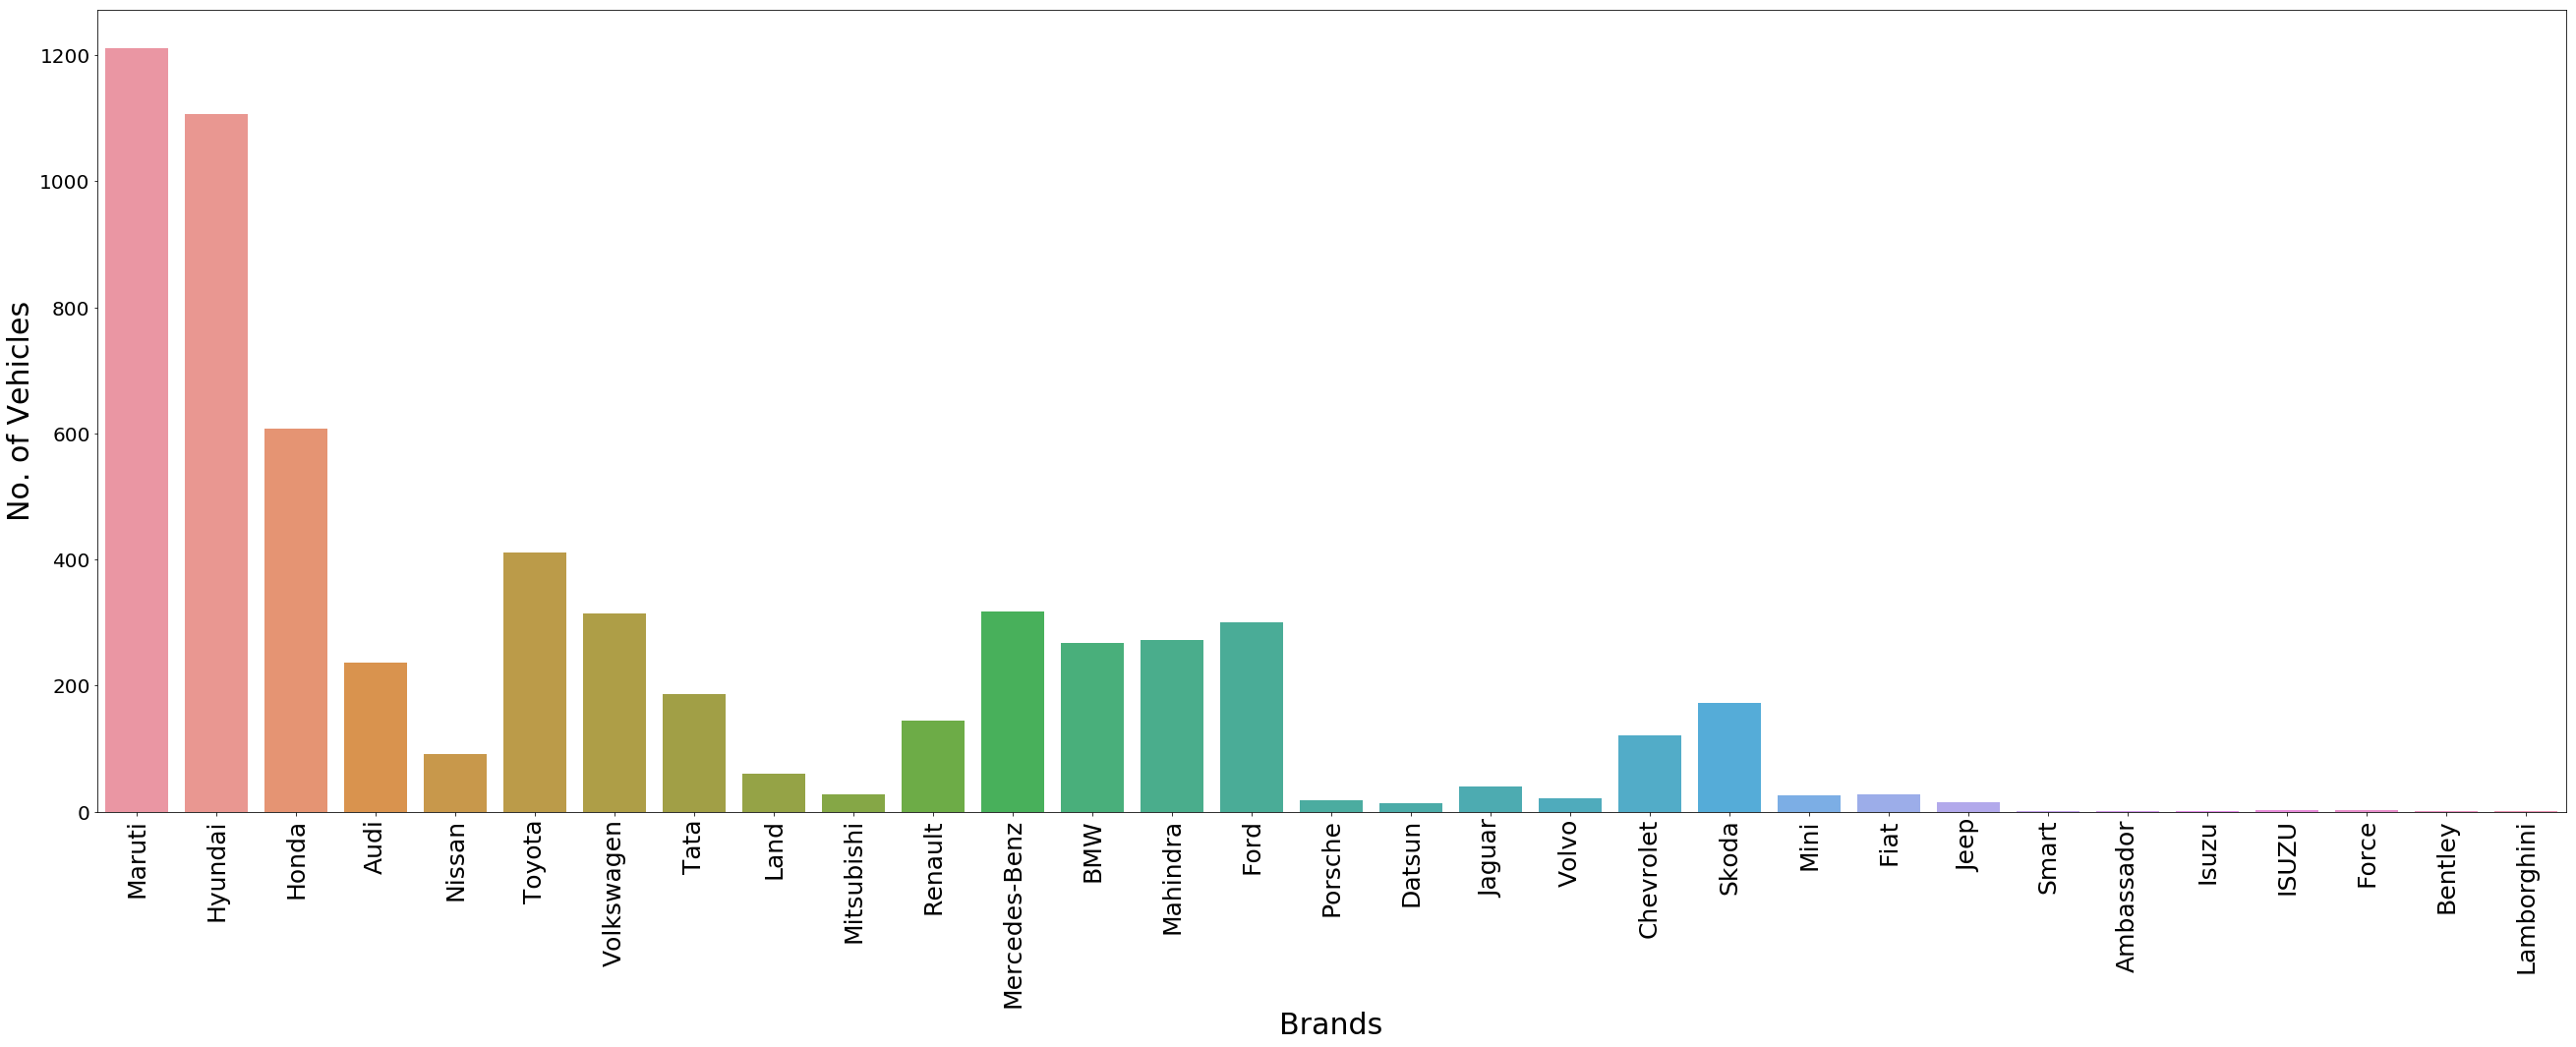

In [5]:
print("Unique Brands:", d_train['brand_name'].nunique())
plt.rcParams['figure.figsize']=(45,15)
d_train.brand_name.value_counts()
sns.countplot(d_train['brand_name'])
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Brands',fontsize=30)
plt.ylabel('No. of Vehicles',fontsize=30)

<BarContainer object of 31 artists>

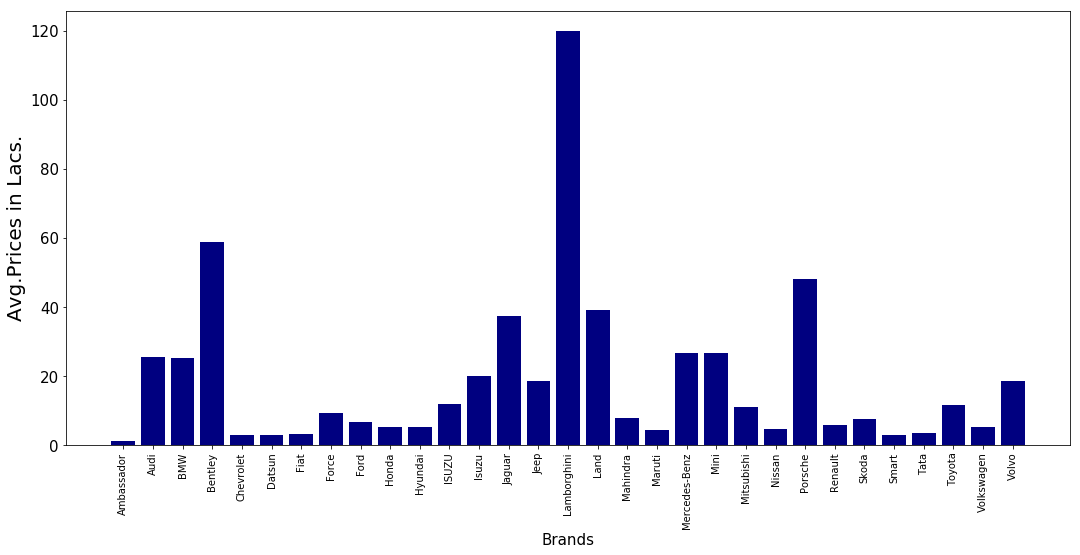

In [6]:
plt.rcParams['figure.figsize']=(18,8)
df = pd.DataFrame(d_train.groupby('brand_name')['Price'].mean())
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Brands',fontsize=15)
plt.ylabel('Avg.Prices in Lacs.',fontsize=20)
plt.bar(df.index,df.Price,color='navy')

Text(0, 0.5, 'Count')

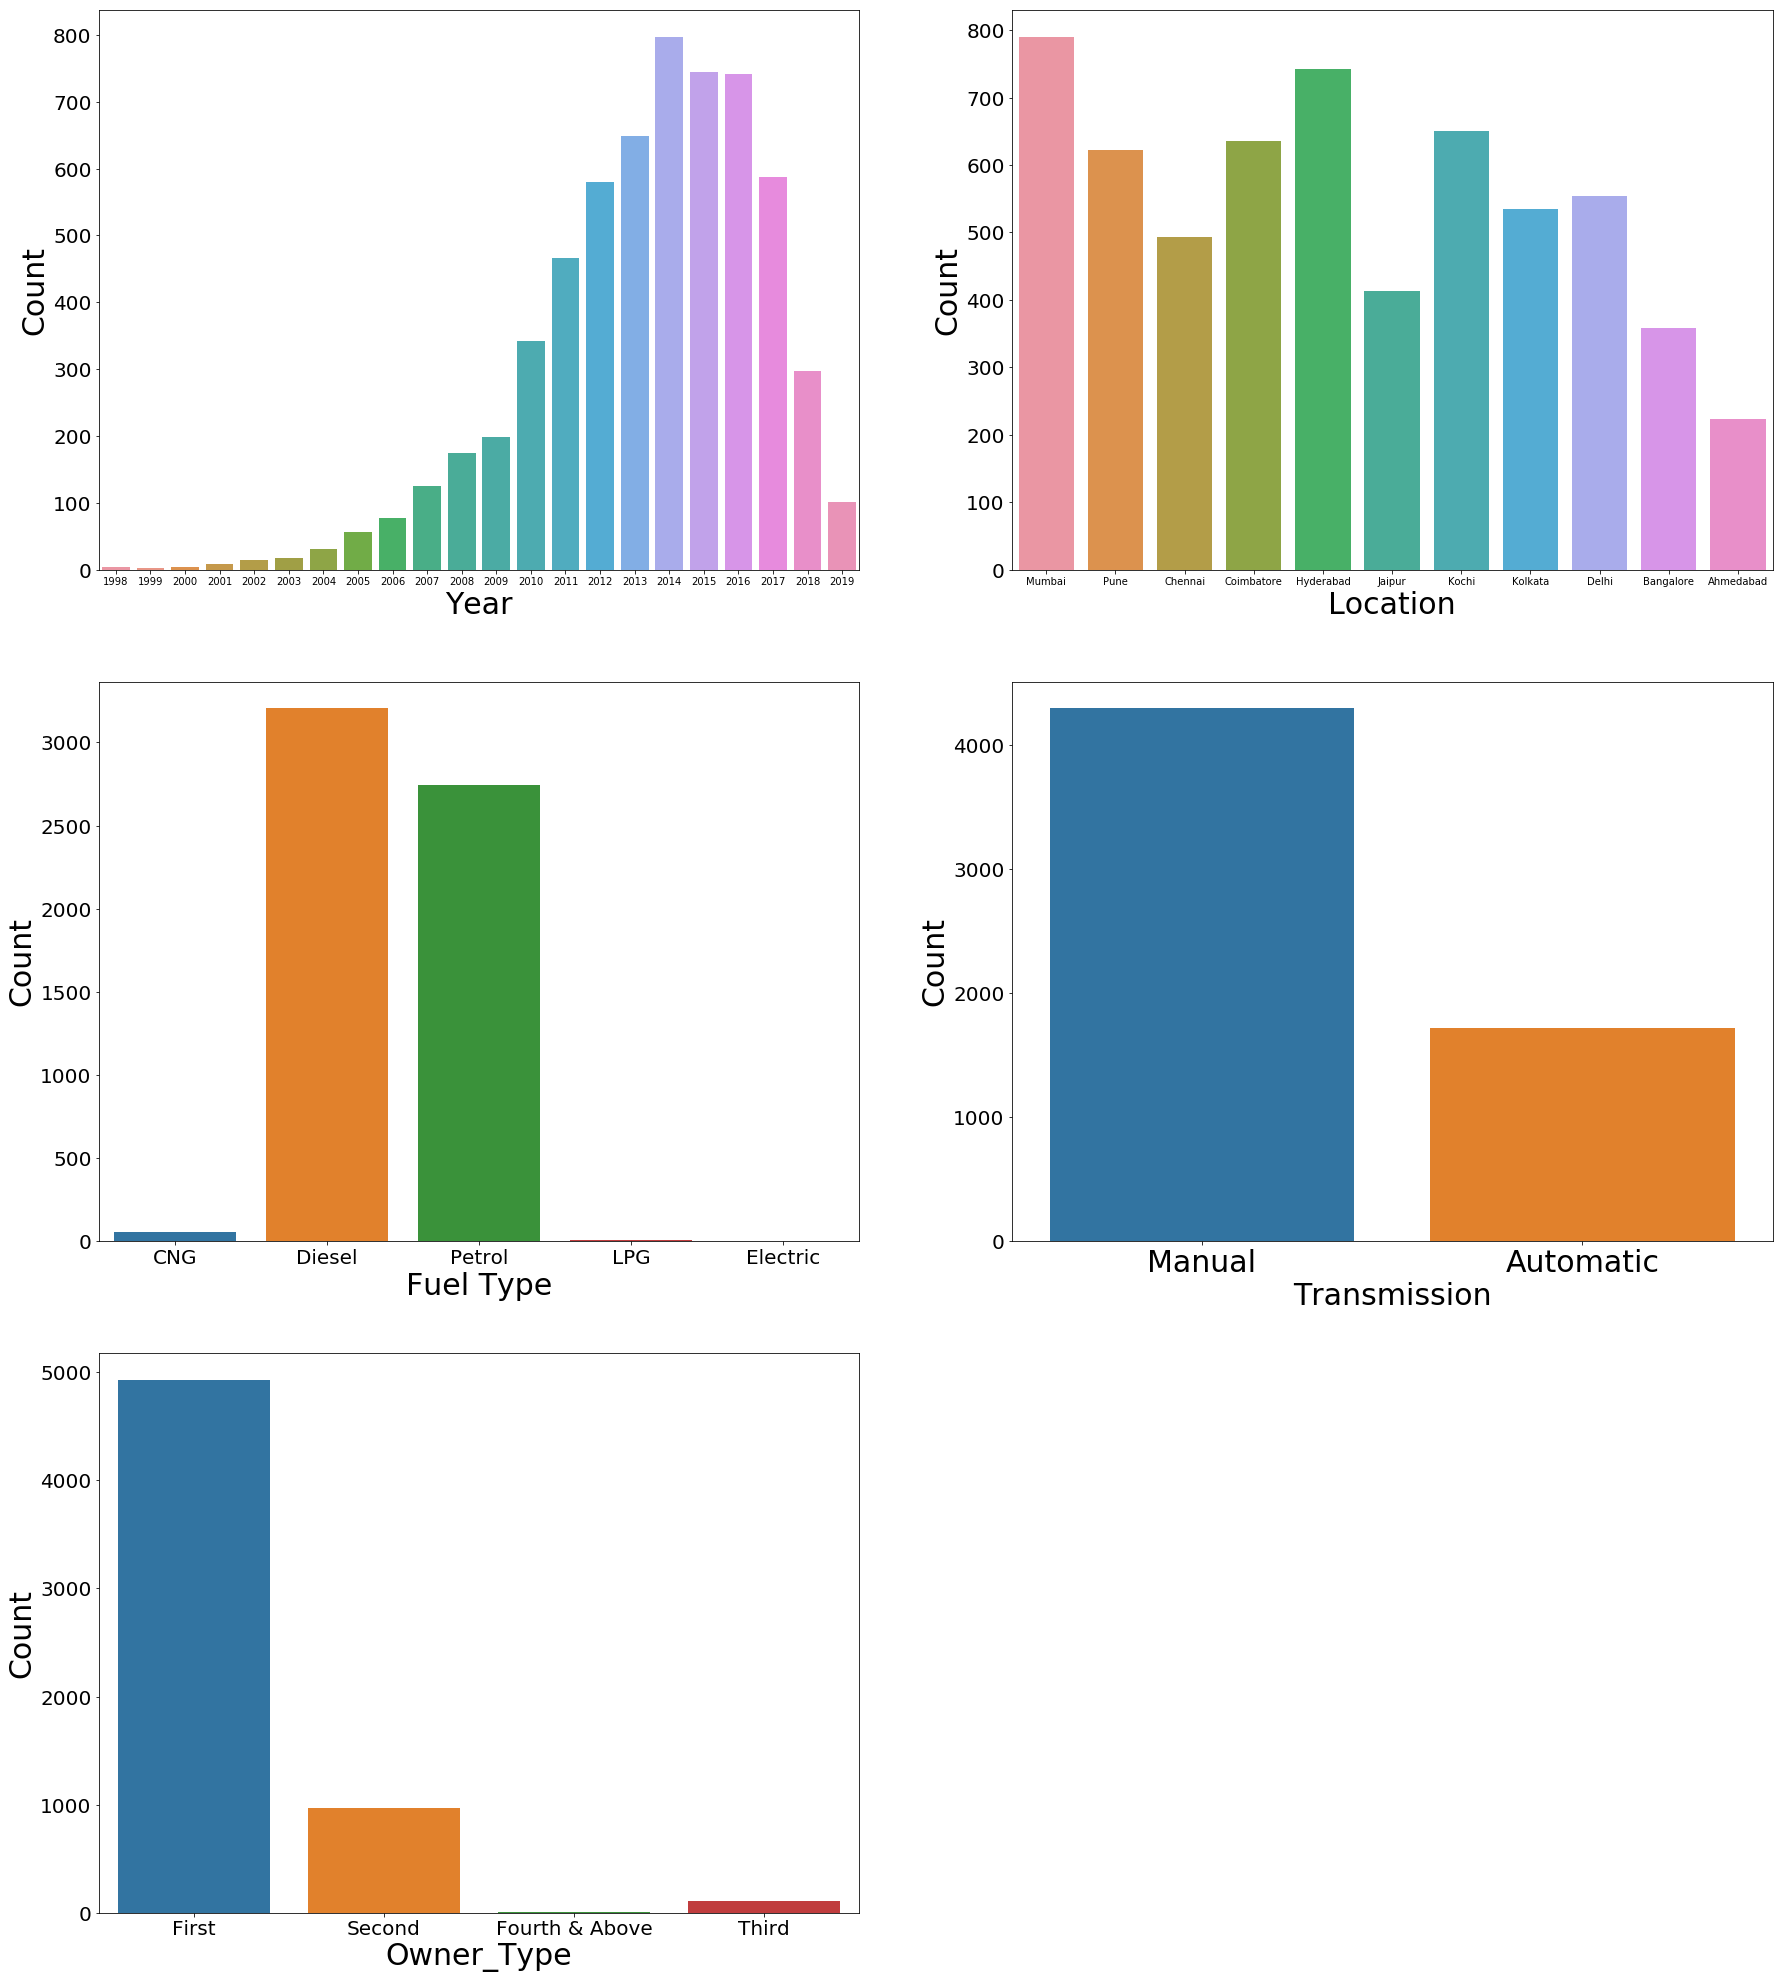

In [7]:
plt.rcParams['figure.figsize']=(30,35)

plt.subplot(3,2,1)
sns.countplot(d_train['Year'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.subplot(3,2,2)
sns.countplot(d_train['Location'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Location',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.subplot(3,2,3)
sns.countplot(d_train['Fuel_Type'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Fuel Type',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.subplot(3,2,4)
sns.countplot(d_train['Transmission'])
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel('Transmission',fontsize=30)
plt.ylabel('Count',fontsize=30)

plt.subplot(3,2,5)
sns.countplot(d_train['Owner_Type'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Owner_Type',fontsize=30)
plt.ylabel('Count',fontsize=30)

In [8]:
def determine_range(Kilometers_Driven):
    if Kilometers_Driven >= 100000 and Kilometers_Driven <= 1000000:
        return '100k-1000k Km'
    elif Kilometers_Driven >=70000 and Kilometers_Driven < 100000:
        return '70k-100k Km'
    elif Kilometers_Driven >=40000 and Kilometers_Driven < 70000:
        return '40k-70k Km '
    elif Kilometers_Driven >= 10000 and Kilometers_Driven <40000 :
        return '10k-40k Km '
    elif Kilometers_Driven >=5000 and Kilometers_Driven < 10000:
        return '5k-10k Km '
    elif Kilometers_Driven >=0 and Kilometers_Driven < 5000:
        return '0-5k Km'
d_train['Driven_Range']=d_train['Kilometers_Driven'].apply(determine_range)
print(d_train['Driven_Range'].value_counts())


40k-70k Km       2345
10k-40k Km       1762
70k-100k Km      1181
100k-1000k Km     548
5k-10k Km         109
0-5k Km            73
Name: Driven_Range, dtype: int64


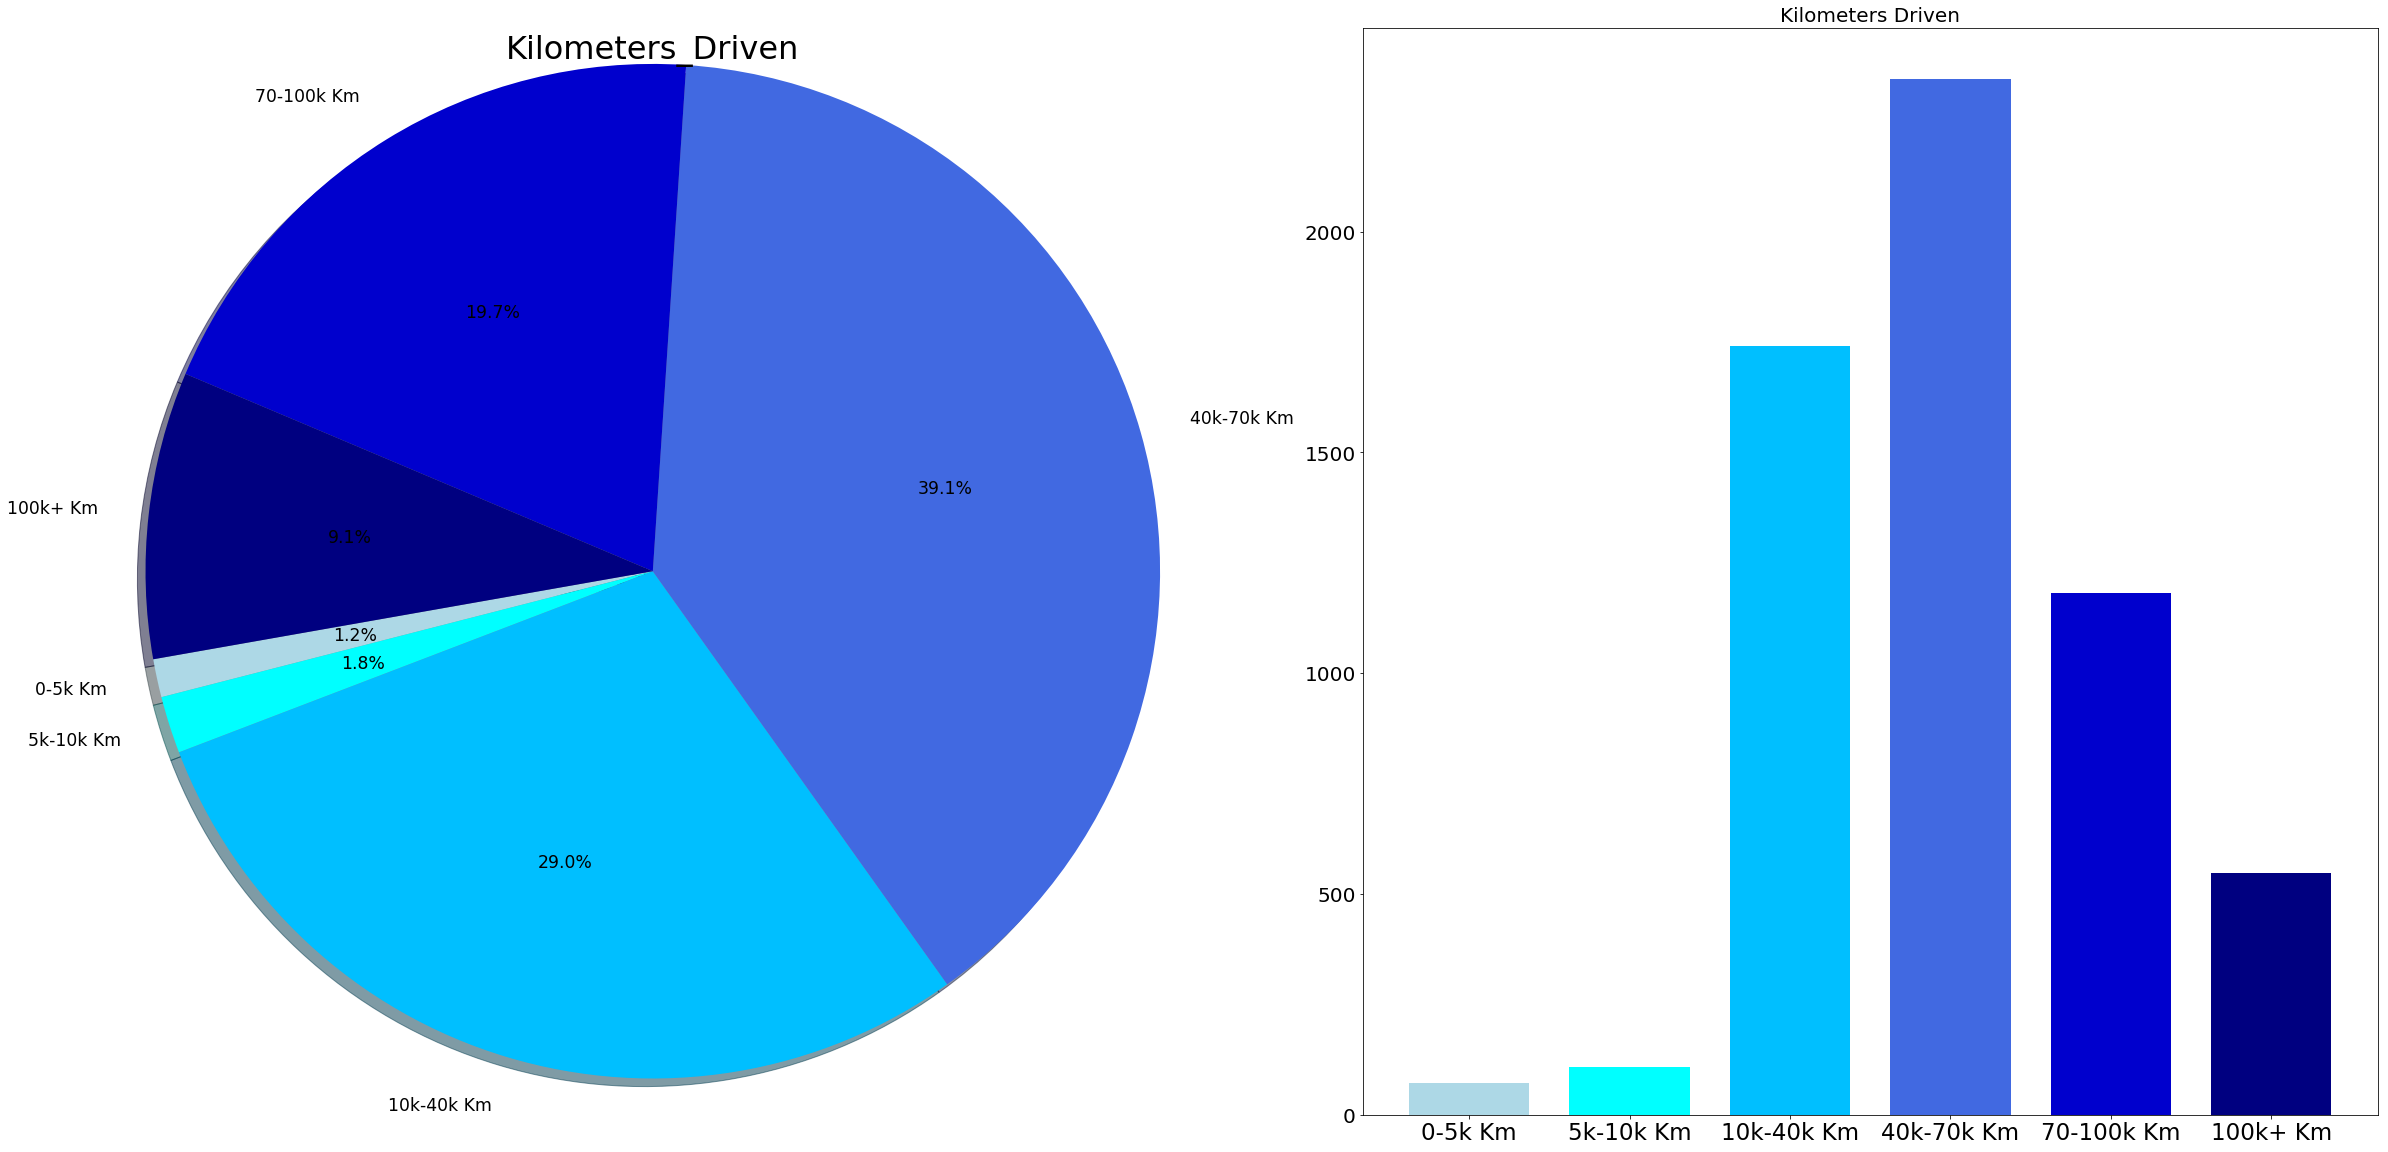

In [9]:
plt.rcParams['figure.figsize']=(40,20)

plt.subplot(1,2,1)
slices=[73,109,1742,2345,1181,548]
activities=["0-5k Km","5k-10k Km","10k-40k Km","40k-70k Km","70-100k Km","100k+ Km"]
colors=['lightblue','cyan','deepskyblue','royalblue','mediumblue','navy']
plt.pie(slices,labels=activities,colors=colors,shadow=True,startangle=190,
        autopct='%1.1f%%',textprops={'size':'xx-large'},radius=1.25)
plt.title("Kilometers_Driven",fontsize=32)


plt.subplot(1,2,2)
objects=["0-5k Km","5k-10k Km","10k-40k Km","40k-70k Km","70-100k Km","100k+ Km"]
x_pos=[2,4,6,8,10,12]
perf=[73,109,1742,2345,1181,548]
plt.bar(x_pos, perf, width=1.5,color=colors)
plt.xticks(x_pos, objects,fontsize=23)
plt.yticks(fontsize=20)
plt.title('Kilometers Driven',fontsize=20)



plt.show()

#### Let's look at variables like Mileage, Power, Engine. We can observe that they have different units of measurement. So instead of encoding these variables we can just extract the numerical values alone from these variables. We further drop the Name feature. 

#### We will perform this method for both training set as well as test set

In [10]:
import re

d_train['Mileage'] = d_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
d_train['Engine'] = d_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
d_train['Power'] = d_train['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

d_train.drop(columns=["Name","Driven_Range"],inplace= True)

d_train['Mileage'] = pd.to_numeric(d_train['Mileage'], errors='coerce')
d_train['Engine'] = pd.to_numeric(d_train['Engine'], errors='coerce')
d_train['Power'] = pd.to_numeric(d_train['Power'], errors='coerce')

d_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


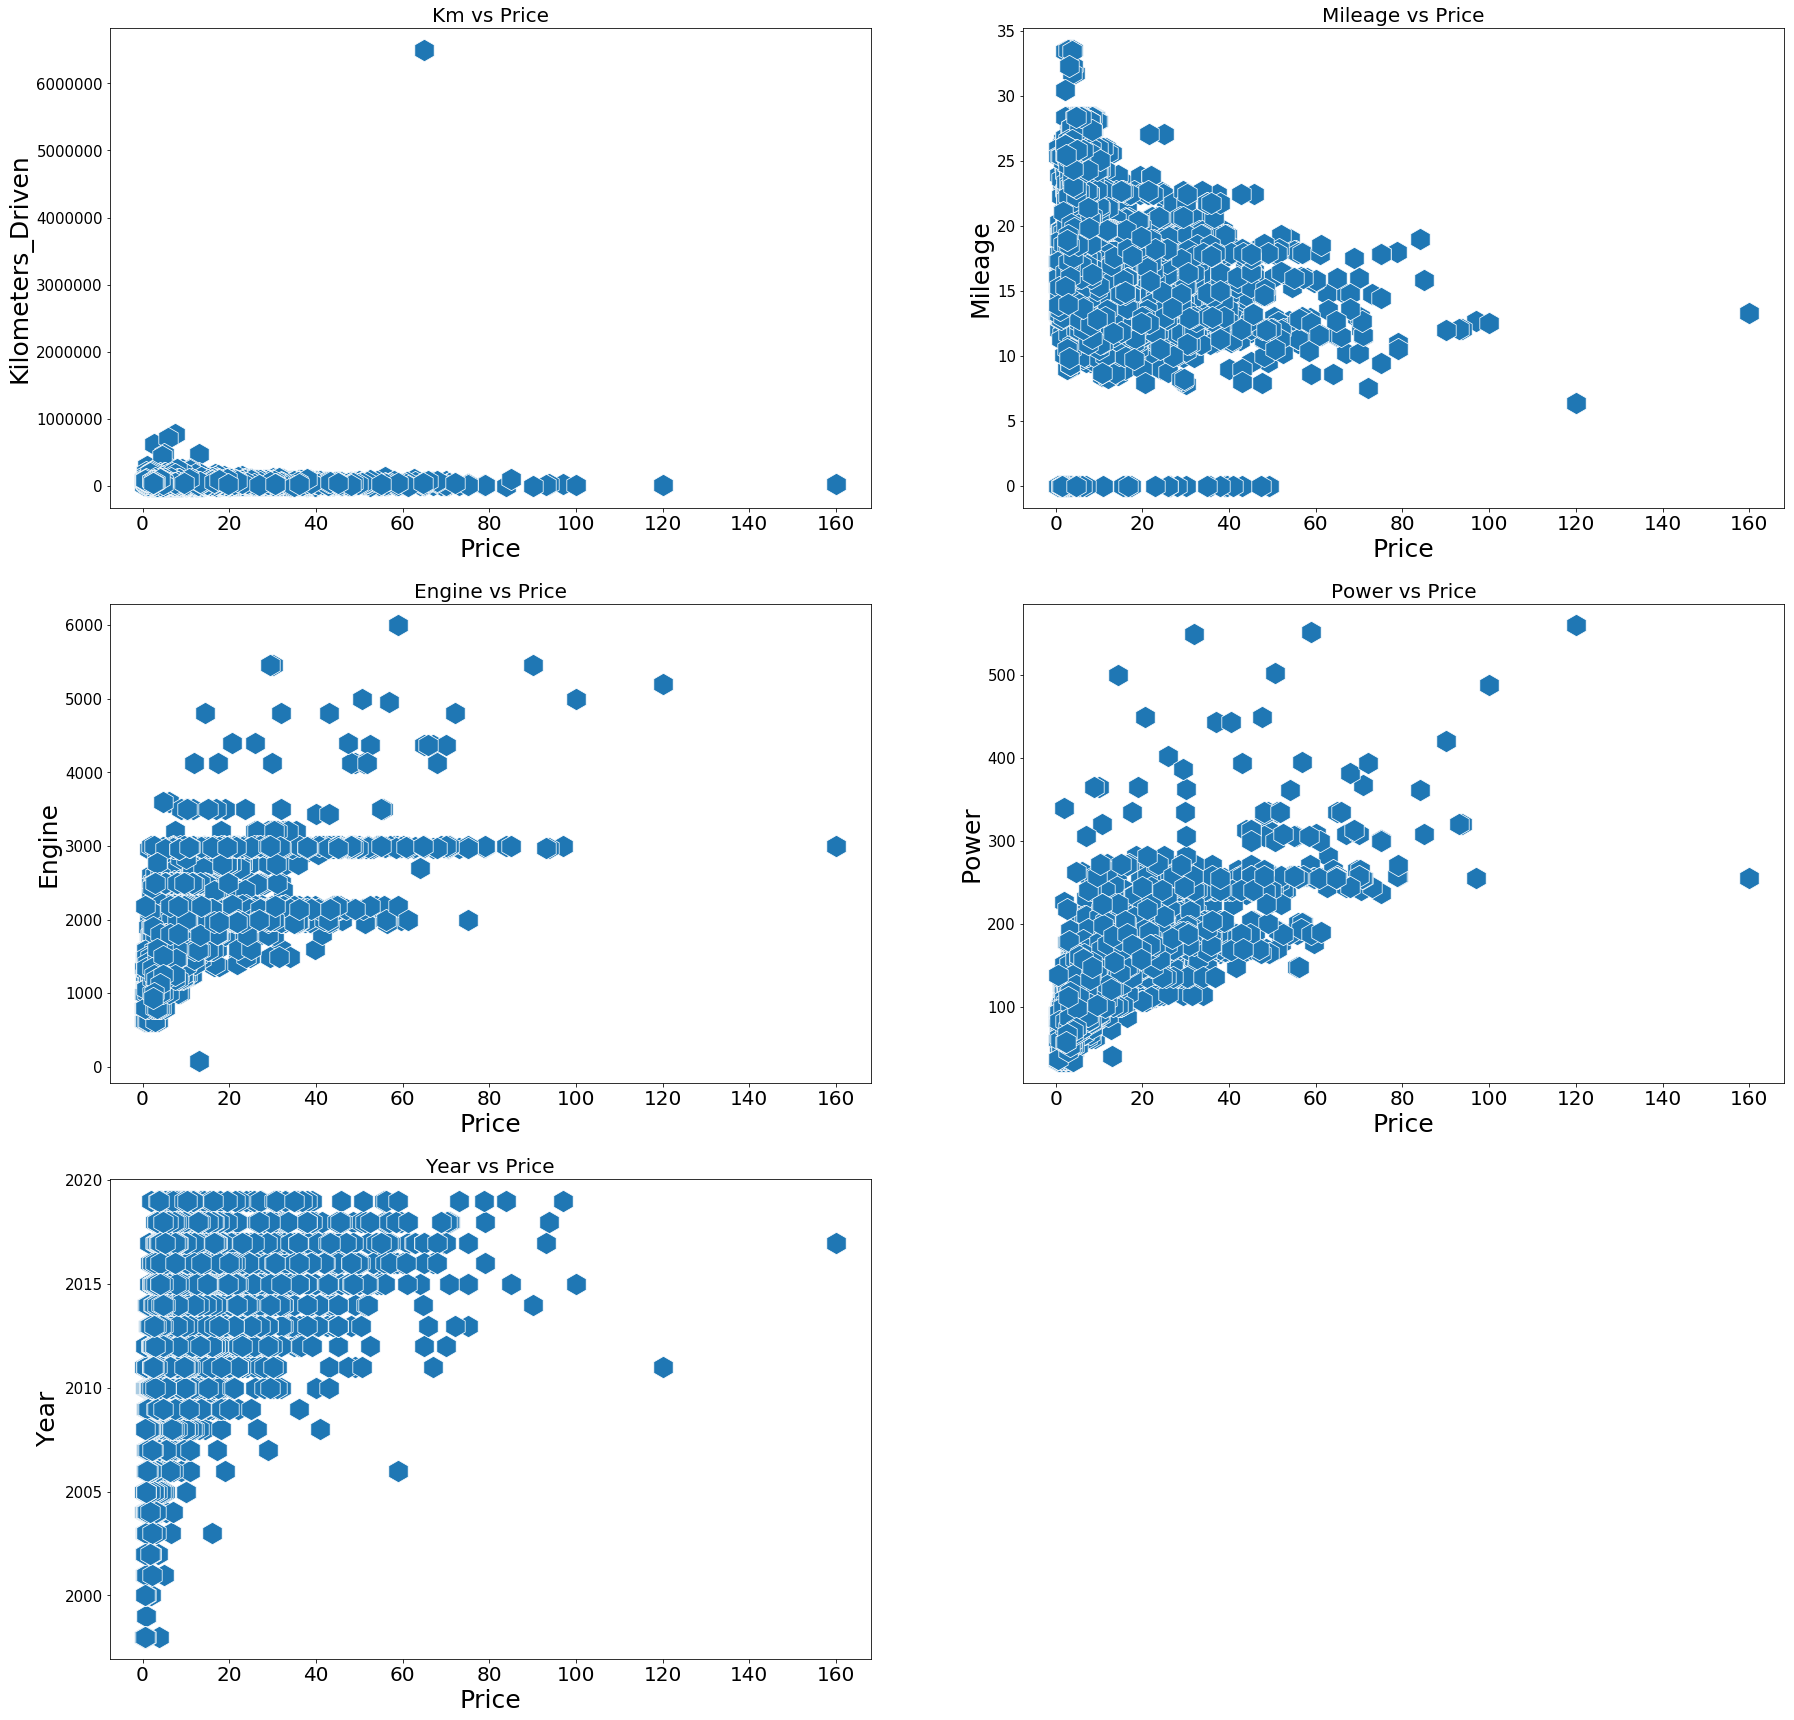

In [11]:
plt.rcParams['figure.figsize']=(30,30)
plt.subplot(3,2,1)
sns.scatterplot(y="Kilometers_Driven", x="Price",data=d_train, s=500, marker='h')
plt.xlabel('Price',fontsize=25)
plt.ylabel('Kilometers_Driven',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('Km vs Price',fontsize=20)

plt.subplot(3,2,2)
sns.scatterplot(y="Mileage", x="Price", data=d_train,s=500, marker='h')
plt.xlabel('Price',fontsize=25)
plt.ylabel('Mileage',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('Mileage vs Price',fontsize=20)

plt.subplot(3,2,3)
sns.scatterplot(y="Engine", x="Price", data=d_train,s=500, marker='h')
plt.xlabel('Price',fontsize=25)
plt.ylabel('Engine',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('Engine vs Price',fontsize=20)

plt.subplot(3,2,4)
sns.scatterplot(y="Power", x="Price", data=d_train,s=500, marker='h')
plt.xlabel('Price',fontsize=25)
plt.ylabel('Power',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('Power vs Price',fontsize=20)

plt.subplot(3,2,5)
sns.scatterplot(y="Year", x="Price", data=d_train,s=500, marker='h')
plt.xlabel('Price',fontsize=25)
plt.ylabel('Year',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('Year vs Price',fontsize=20)

plt.show()

In [12]:
d_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [13]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5876 non-null float64
Seats                5977 non-null float64
Price                6019 non-null float64
brand_name           6019 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


#### We we fill the null values and missing values with the help of data preprocessing techniques and eliminate the outlier.

In [14]:
d_train.Seats=d_train.Seats.fillna(5)
d_train.Mileage=d_train.Mileage.fillna(18.2)

nan_value = float("NaN")
d_train.replace("", nan_value, inplace=True)

d_train.dropna(subset = ["Power","Engine"], inplace=True)

#elimate the outlier
d_train.drop(d_train[d_train['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

In [15]:
correlation_matrix=d_train.corr().round(2)
correlation_matrix['Price'].sort_values(ascending=False)

Price                1.00
Power                0.77
Engine               0.66
Year                 0.30
Seats                0.06
Kilometers_Driven   -0.16
Mileage             -0.34
Name: Price, dtype: float64

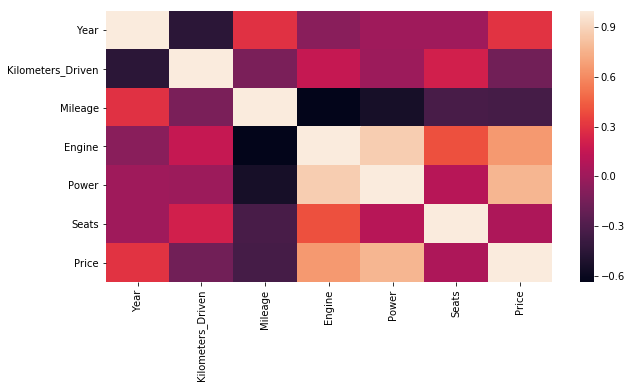

In [16]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(correlation_matrix)

From above visualizations we can obtain some regular insights and correlations between Mileage, Power, Kilometers_Driven, Seats and Year variables with the Price Variable.
 * So from this analysis we can categorize our independant and dependant variables
  * Independant Variables X : Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats (We are not considering Name variable because there is no considerable correlation to the price)
  * Dependant Variable y : Price

* We can also observe that the distributiom of the data is non-linear

#### Encoding all the Categorical variables in Training Set
 - We will create 'Dummy Variables' for the categorical variables using LabelEncoder, OneHotEncoder class and will apply the encoded variables to training set itself using ColumnTransformer(). Finally, we will drop one dummy variable column to avoid Dummy variable trap.
 - We will perform the above method individually for all categorical variables in X

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
dfle = d_train
dfle.brand_name=le.fit_transform(dfle.brand_name)
dfle.Location=le.fit_transform(dfle.Location)
dfle.Fuel_Type=le.fit_transform(dfle.Fuel_Type)
dfle.Transmission=le.fit_transform(dfle.Transmission)
dfle.Owner_Type=le.fit_transform(dfle.Owner_Type)

In [19]:
dfle.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,18
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,10
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,9
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,18
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1


#### Creating array X for Independant variables
#### Creating vector y for Dependant variable

In [20]:
X_train=dfle.drop('Price',axis='columns')
y_train=dfle['Price']

### Test Set
We will repeat the same process for Test set 

In [21]:
d_test['brand_name'] = d_test['Name'].apply(lambda x: str(x).split(" ")[0])
d_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,brand_name
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota


In [22]:
d_test['Mileage'] = d_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
d_test['Engine'] = d_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
d_test['Power'] = d_test['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

d_test.drop(columns=["Name"],inplace= True)

d_test['Mileage'] = pd.to_numeric(d_test['Mileage'], errors='coerce')
d_test['Engine'] = pd.to_numeric(d_test['Engine'], errors='coerce')
d_test['Power'] = pd.to_numeric(d_test['Power'], errors='coerce')

d_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,brand_name
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai


In [23]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1224 non-null float64
Power                1202 non-null float64
Seats                1223 non-null float64
brand_name           1234 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 106.1+ KB


In [24]:
d_test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1224.000000,1202.000000,1223.000000
mean,2013.400324,58507.288493,18.173857,1593.584967,110.380420,5.284546
std,3.179700,35598.702098,4.464615,564.347723,51.543818,0.825622
min,1996.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.215000,1198.000000,75.000000,5.000000
50%,2014.000000,54572.500000,18.250000,1461.000000,93.700000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,130.000000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


#### Taking care of missing data

In [25]:
d_test.Seats=d_test.Seats.fillna(5)
d_test.Mileage=d_test.Mileage.fillna(18.2)
d_test.Engine=d_test.Engine.fillna(1595)
d_test.Power=d_test.Power.fillna(110)

#### Encoding all the Categorical variables

In [26]:
dfle1 = d_test
dfle1.brand_name=le.fit_transform(dfle1.brand_name)
dfle1.Location=le.fit_transform(dfle1.Location)
dfle1.Fuel_Type=le.fit_transform(dfle1.Fuel_Type)
dfle1.Transmission=le.fit_transform(dfle1.Transmission)
dfle1.Owner_Type=le.fit_transform(dfle1.Owner_Type)

In [27]:
dfle1.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,brand_name
0,4,2014,40929,0,1,0,32.26,998.0,58.2,4.0,16
1,3,2013,54493,3,1,2,24.70,796.0,47.3,5.0,16
2,9,2017,34000,1,1,0,13.68,2393.0,147.8,7.0,26


In [28]:
dfle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Location             1234 non-null int32
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null int32
Transmission         1234 non-null int32
Owner_Type           1234 non-null int32
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1234 non-null float64
Seats                1234 non-null float64
brand_name           1234 non-null int32
dtypes: float64(4), int32(5), int64(2)
memory usage: 82.0 KB


In [29]:
X_test=dfle1

# Model Testing (Gradient Boosting)

In [30]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X_train, y_train, test_size=0.2,random_state=0)


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

### Let's tune hyperparameters

In [32]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.1,0.15,0.2,0.25,0.3],'n_estimators':[100,150,200,250,300]}


In [33]:
tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid =LR,scoring='r2')
tuning.fit(X_tr,y_tr)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.3, 'n_estimators': 150}, 0.8999873301204451)

# Final Model

In [34]:
gradientregressor=GradientBoostingRegressor(n_estimators=150, learning_rate = 0.3)

In [35]:
model = gradientregressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### We will also use k-Fold Cross Validation method to find the average accuracy and deviation of predictions of our model with 10 foldings

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gradientregressor,X_train,y_train,cv=10)
score

array([0.93990664, 0.91685491, 0.94083241, 0.92309883, 0.91798832,
       0.79864191, 0.82752374, 0.95056198, 0.90141247, 0.90574142])

In [39]:
print("Maximum Accuracy : ",round(max(score)*100, 2),"%")
print("Average Accuracy : " ,round(score.mean()*100,2),"%")
print("Average Deviation : ",round(score.std()*100,2),"%")

Maximum Accuracy :  95.16 %
Average Accuracy :  90.25 %
Average Deviation :  5.39 %


#### Now let's write these good predictions back to our test data

In [40]:
y_pred = pd.DataFrame(data = y_pred, columns = ["Price (Predicted)"]) # Converting y_pred into a Dataframe
y_pred = y_pred.round(2)

df = pd.read_excel('Data_Test.xlsx') # Reassigning df back to original test data
df =pd.concat([df, y_pred], axis=1) # Concatenating df and y_pred

df.head(10)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (Predicted)
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,4.17
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,2.71
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,13.69
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,4.89
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,4.69
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,16.52
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,20.23
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,2.08
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,3.32
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,14.47


#### Our resultant dataset is ready and this is what it looks like. The predictions are really good when compared to an intuitive prediction

#### Let's write df back into a xlsx sheet. And, I have named the xlsx sheet as Data_Test_SOLVED.xlsx

In [41]:
df.to_excel('Data_Test_SOLVED.xlsx', engine='xlsxwriter', index = False)